#### This dataset is created for prediction of Graduate Admissions from an Indian perspective.
### Notebook by [Sourav Bansal]
(https://github.com/Sourav277)

   #### Parameters:-
1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose 
5. Letter of Recommendation Strength ( out of 5 ) 
6. Undergraduate GPA ( out of 10 ) 
7. Research Experience ( either 0 or 1 ) 
8. Chance of Admit ( ranging from 0 to 1 )
<br/><br/>
<p>This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.
    </p>

In [9]:
# importing libraries
%matplotlib inline
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [10]:
data = pd.read_csv("Admission_Predict.csv",na_values=['NA'])
data.shape

(500, 9)

In [11]:
data.head()          #By default ,Head()Shows first five rows of dataset 

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Pandas knows to treat rows with 'NA' as missing values.

Next, it's always a good idea to look at the distribution of our data — especially the outliers.

Let's start by printing out some summary statistics about the data set.


In [12]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


We can see several useful values from this table. For Example,We can see there is no missing value in the dataset.And we have 500 samples in this dataset. That's Preety good!


In [13]:
data=data.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB
None


Most important features for admission to the Master: CGPA, GRE SCORE, and TOEFL SCO
 
Least important features for admission to the Master: Research, LOR, and SOP

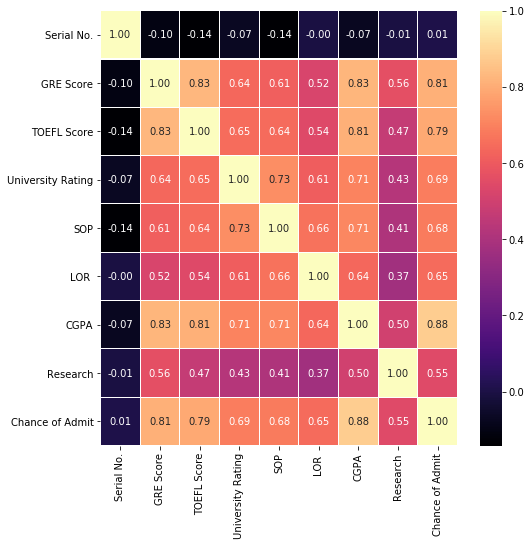

In [15]:
fig,ax= plt.subplots(figsize=(8, 8))
sb.heatmap(data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

##  DATA VISUALIZATION



### Having Research or not:

1. The majority of the candidates in the dataset have research experience.
2. Therefore, the Research will be a unnecessary feature for the Chance of Admit. The correlation between Chance of    Admit and Research was already lower than other correlation values.



In [16]:
print("Not Having Research:",len(data[data.Research == 0]))
print("Having Research:",len(data[data.Research == 1]))
y = np.array([len(data[data.Research == 0]),len(data[data.Research == 1])])
x = ["Not Having Research","Having Research"]
plt.bar(x,y)
plt.title("Research Experience")
plt.xlabel("Candidates")
plt.ylabel("Frequency")
plt.show()

Not Having Research: 220
Having Research: 280


NameError: name 'np' is not defined



### GRE Score:

1. This histogram shows the frequency for GRE scores.
2. There is  density between 310 and 330. Being above this range would be a good feature for a candidate to stand out.



In [ ]:
data["GRE Score"].plot(kind = 'hist',bins = 220,figsize = (7,7))
plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

### TOEFL Score:


In [ ]:
y = np.array([data["TOEFL Score"].min(),data["TOEFL Score"].mean(),data["TOEFL Score"].max()])
x = ["Worst","Average","Best"]
plt.bar(x,y)
plt.title("TOEFL Scores")
plt.xlabel("Level")
plt.ylabel("TOEFL Score")
plt.show()

* The TOEFL score is:-
  
  lowest TOEFL :92
  
  highest TOEFL :120 
  
  The average is :107.41


### CGPA Scores for University Ratings:

In [ ]:
plt.scatter(data["University Rating"],data.CGPA)
plt.title("CGPA Scores for University Ratings")
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.show()

* As the quality of the university increases, the CGPA score also increases.
* Candidates with higher GRE score usually have  higher CGPA score.

In [ ]:
plt.scatter(data["GRE Score"],data.CGPA)
plt.title("CGPA for GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.show()

In [ ]:
data[data.CGPA >= 8.5].plot(kind='scatter', x='GRE Score', y='TOEFL Score',color="green")
plt.xlabel("GRE Score")
plt.ylabel("TOEFL SCORE")
plt.title("CGPA>=8.5")
plt.grid(True)
plt.show()



Candidates graduating from good universities have more chances to be accepted!

In [ ]:
df = data[data["Chance of Admit"] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
df.plot(kind='bar',figsize=(20, 10))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()



*  Candidates with high CGPA score generally have  high SOP score.

In [ ]:
plt.scatter(data["CGPA"],data.SOP)
plt.xlabel("CGPA")
plt.ylabel("SOP")
plt.title("SOP for CGPA")
plt.show()



* Candidates with high GRE scores usually have  higher SOP score!

In [ ]:
plt.scatter(data["GRE Score"],data["SOP"])
plt.xlabel("GRE Score")
plt.ylabel("SOP")
plt.title("SOP for GRE Score")
plt.show()

After all this hard work, we don't want to repeat this process every time we work with the data set. Let's save the tidied data file as a separate file and work directly with that data file from now on.

In [ ]:
data.to_csv('data-clean.csv', index=False)

data_clean = pd.read_csv('data-clean.csv')
data_clean.head()

## Predicting chances of Admission in particular university Using  Regression Algorithms

Serial No. is deleted because it stores index values. In the future this column does not benefit for regression algorithms.

In [ ]:
# reading the dataset
data = pd.read_csv("data-clean.csv",sep = ",")

# it may be needed in the future.
serialNo = data["Serial No."].values

data.drop(["Serial No."],axis=1,inplace = True)




##### train_test_split:

    Splits the data into random training (80%) and testing (20%) subsets.



In [ ]:
y = data["Chance of Admit"].values
x = data.drop(["Chance of Admit"],axis=1)

# separating training (80%) and test (%20) sets
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 89)



Normalization (min-max scaling):
       
       It makes values scaled to a fixed range (i.e 0-1)



In [ ]:
# Normalization
from sklearn.preprocessing import MinMaxScaler
scalerX = MinMaxScaler(feature_range=(0, 1))
x_train[x_train.columns] = scalerX.fit_transform(x_train[x_train.columns])
x_test[x_test.columns] = scalerX.transform(x_test[x_test.columns])

#### r2_score:
* It is the regression score function.
* It may be negative.
* The best possible score is 1.0 for r2_score.


In [ ]:
# Decision Tree Regression Algorithm:-

from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 89)
dt.fit(x_train,y_train)
y_head_dt = dt.predict(x_test) 

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_dt))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(dt.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(dt.predict(x_test.iloc[[2],:])))

y_head_dt_train = dt.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_dt_train))


In [ ]:
# Linear Regression Algorithm:-
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_head_lr = lr.predict(x_test)

print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(lr.predict(x_test.iloc[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(lr.predict(x_test.iloc[[2],:])))

from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_lr))

y_head_lr_train = lr.predict(x_train)
print("r_square score (train dataset): ", r2_score(y_train,y_head_lr_train))

* Linear regression algorithm were better than decision tree regression algorithm.

In [ ]:
y = np.array([r2_score(y_test,y_head_lr),r2_score(y_test,y_head_dt)])
x = ["LinearRegression","DecisionTreeRegression."]
plt.bar(x,y)
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Regressor")
plt.ylabel("r2_score")
plt.show()